In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt


In [2]:
# Función para suavizar las señales
def butter_lowpass_filter(data, cutoff, fs, order=4):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return filtfilt(b, a, data)

In [3]:
# Función para cargar datos
def cargar_datos(file_path):
    data = pd.read_csv(file_path, sep='\t', engine='python', decimal=',')
    data.columns = ['Time', 'X', 'Y']
    data = data.dropna()
    data['Time'] /= 1000  # Convertir ms a s
    return data

In [4]:
# Función para calcular velocidad y aceleración
def calcular_vel_acel(data, time):
    vel = np.gradient(data, time)
    acel = np.gradient(vel, time)
    return vel, acel

In [5]:
# Puntos de interés
file_paths = {
    'muñeca': r"C:\Users\fabia\Desktop\Trackeos\circular\circular_andy_frontal\muñeca.txt",
    'codo': r"C:\Users\fabia\Desktop\Trackeos\circular\circular_andy_frontal\codo.txt",
    'hombro_derecho': r"C:\Users\fabia\Desktop\Trackeos\circular\circular_andy_frontal\hombro_derecho.txt",
    'hombro_izquierdo': r"C:\Users\fabia\Desktop\Trackeos\circular\circular_andy_frontal\hombro_izquierdo.txt",
    'esternon': r"C:\Users\fabia\Desktop\Trackeos\circular\circular_andy_frontal\esternon.txt",
    'cadera_derecha': r"C:\Users\fabia\Desktop\Trackeos\circular\circular_andy_frontal\cadera_derecha.txt",
    'cadera_izquierda': r"C:\Users\fabia\Desktop\Trackeos\circular\circular_andy_frontal\cadera_izquierda.txt",
}

In [6]:
# Cargar y filtrar datos
datos = {label: cargar_datos(path) for label, path in file_paths.items()}
fs = 1 / np.mean(np.diff(datos['muñeca']['Time']))
cutoff = min(20, 0.45 * fs)


In [7]:
# Función para calcular el módulo
def calcular_modulo(x, y):
    """
    Calcula el módulo de un vector dado sus componentes x e y.
    """
    return np.sqrt(x**2 + y**2)


In [8]:
for label in datos:
    datos[label]['X'] = butter_lowpass_filter(datos[label]['X'], cutoff, fs)
    datos[label]['Y'] = butter_lowpass_filter(datos[label]['Y'], cutoff, fs)

Análisis dinámico para muñeca:
1.1 Velocidades:
   - Máxima: 1198.45 cm/s en t = 0.65 s
   - Mínima: 10.45 cm/s en t = 0.02 s
1.2 Aceleraciones:
   - Máxima: 29020.01 cm/s² en t = 0.57 s
   - Mínima: 681.87 cm/s² en t = 0.03 s
--------------------------------------------------


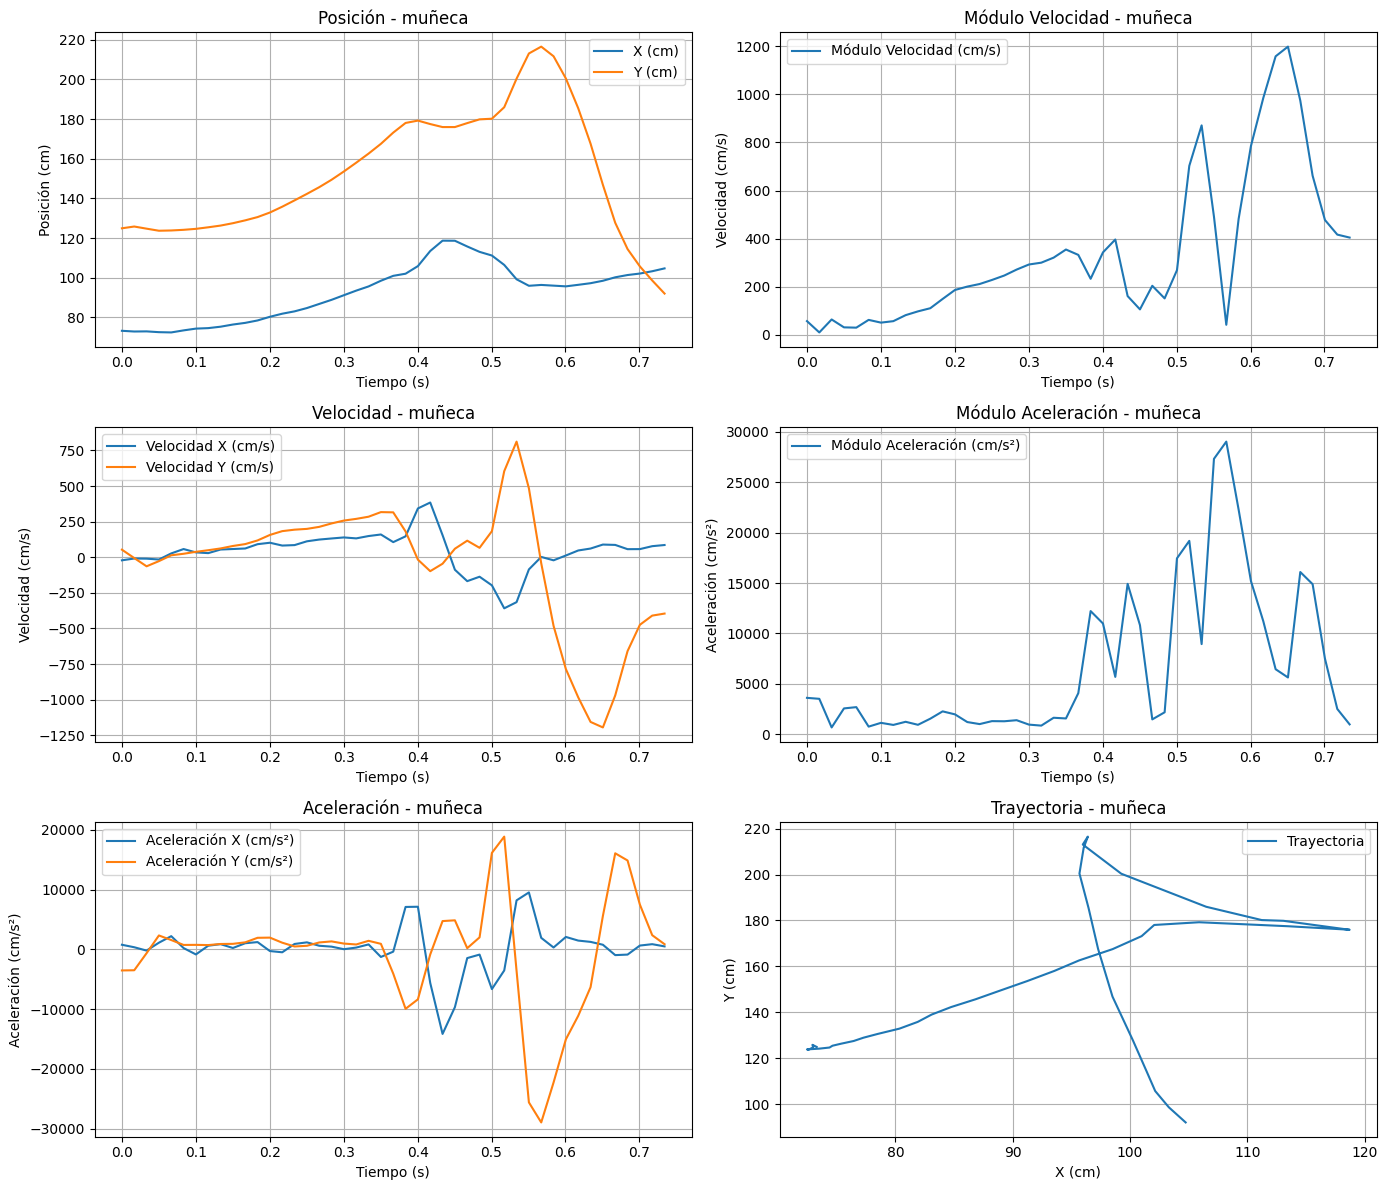

Análisis dinámico para codo:
1.1 Velocidades:
   - Máxima: 710.90 cm/s en t = 0.65 s
   - Mínima: 44.56 cm/s en t = 0.00 s
1.2 Aceleraciones:
   - Máxima: 13357.66 cm/s² en t = 0.67 s
   - Mínima: 499.00 cm/s² en t = 0.70 s
--------------------------------------------------


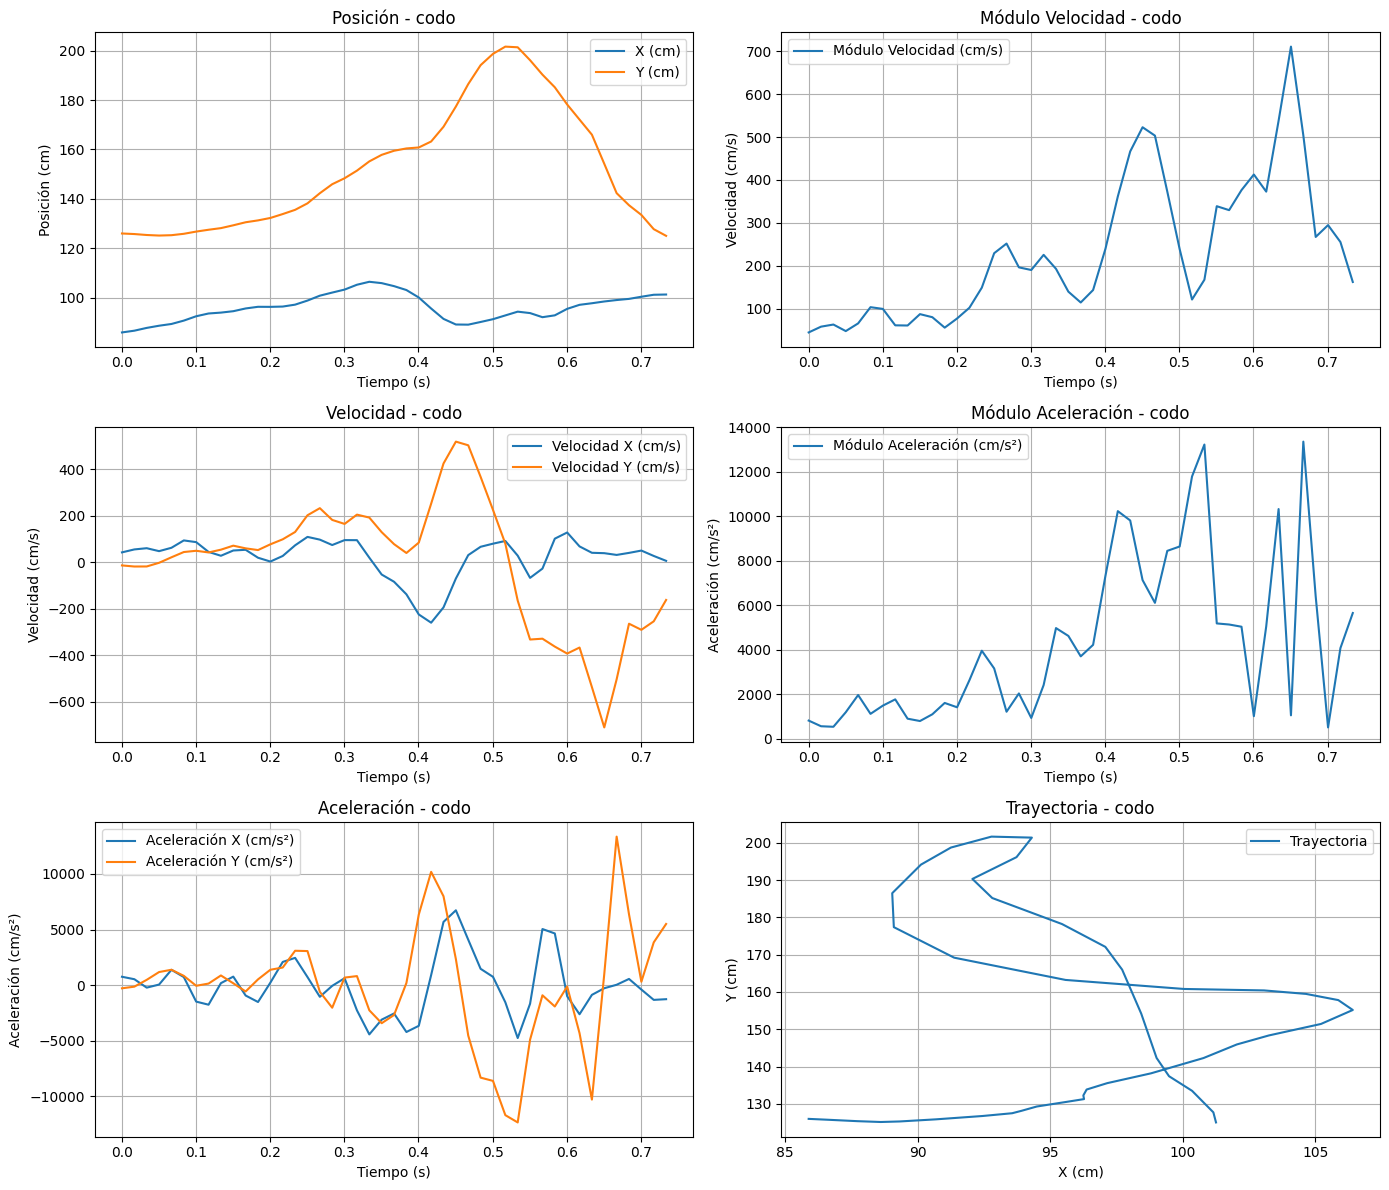

Análisis dinámico para hombro_derecho:
1.1 Velocidades:
   - Máxima: 137.62 cm/s en t = 0.40 s
   - Mínima: 13.60 cm/s en t = 0.03 s
1.2 Aceleraciones:
   - Máxima: 6440.34 cm/s² en t = 0.38 s
   - Mínima: 257.32 cm/s² en t = 0.03 s
--------------------------------------------------


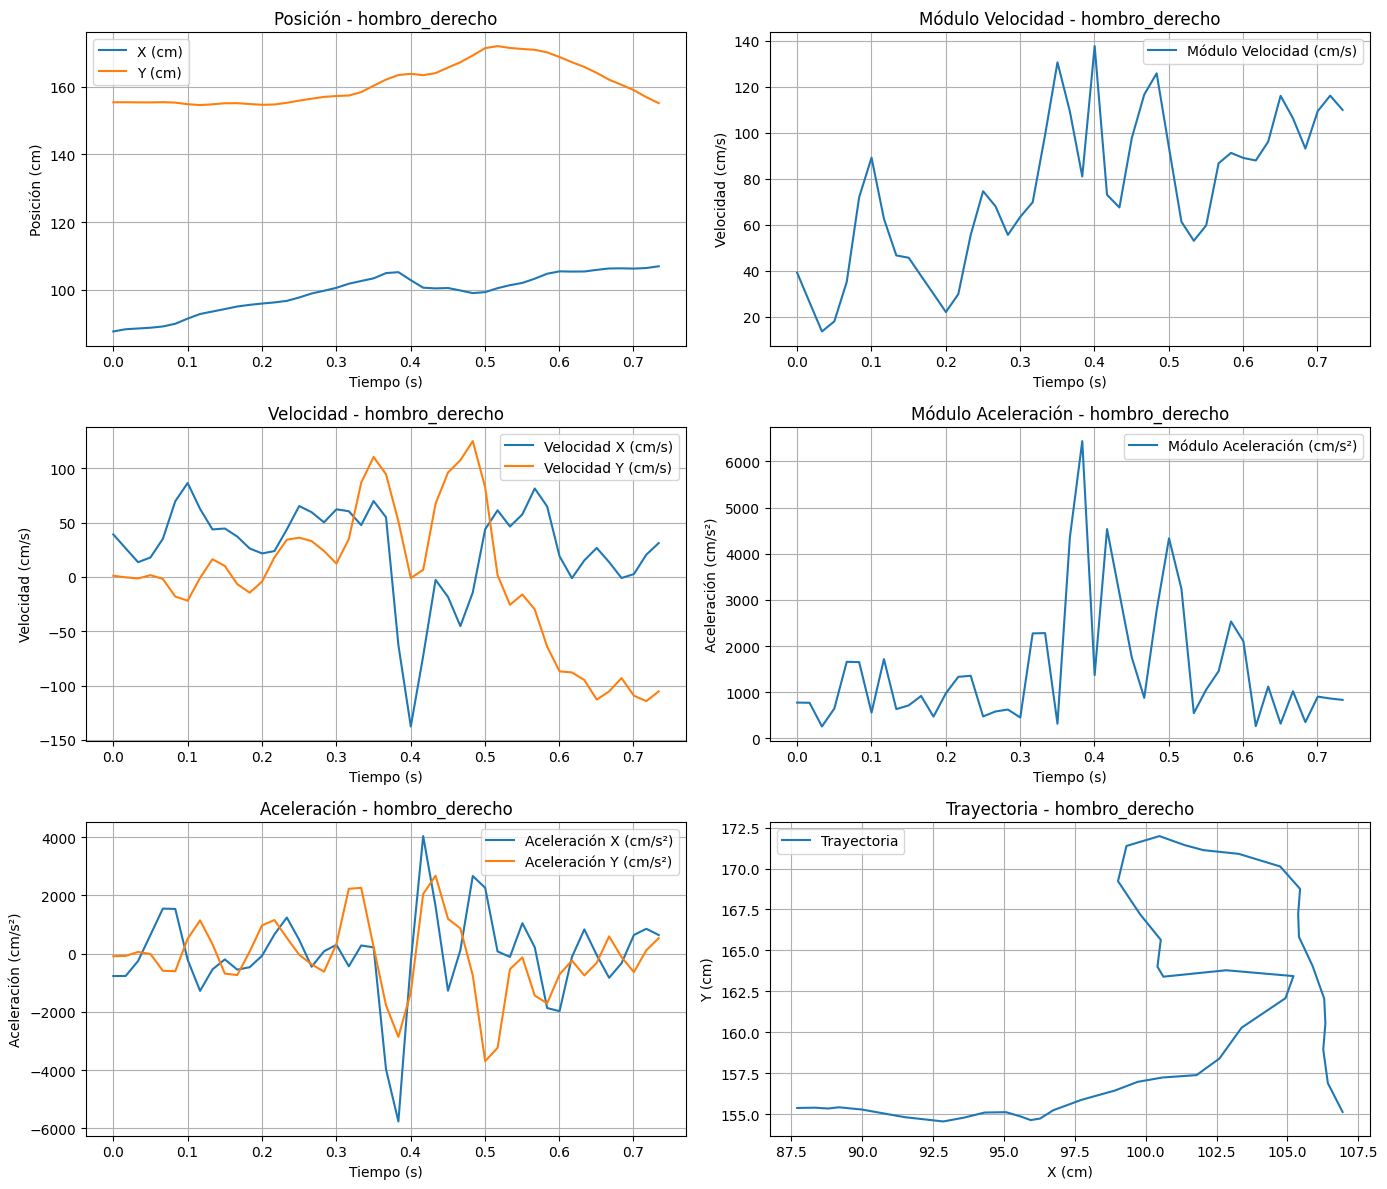

Análisis dinámico para hombro_izquierdo:
1.1 Velocidades:
   - Máxima: 337.68 cm/s en t = 0.42 s
   - Mínima: 1.39 cm/s en t = 0.18 s
1.2 Aceleraciones:
   - Máxima: 8569.83 cm/s² en t = 0.40 s
   - Mínima: 195.82 cm/s² en t = 0.63 s
--------------------------------------------------


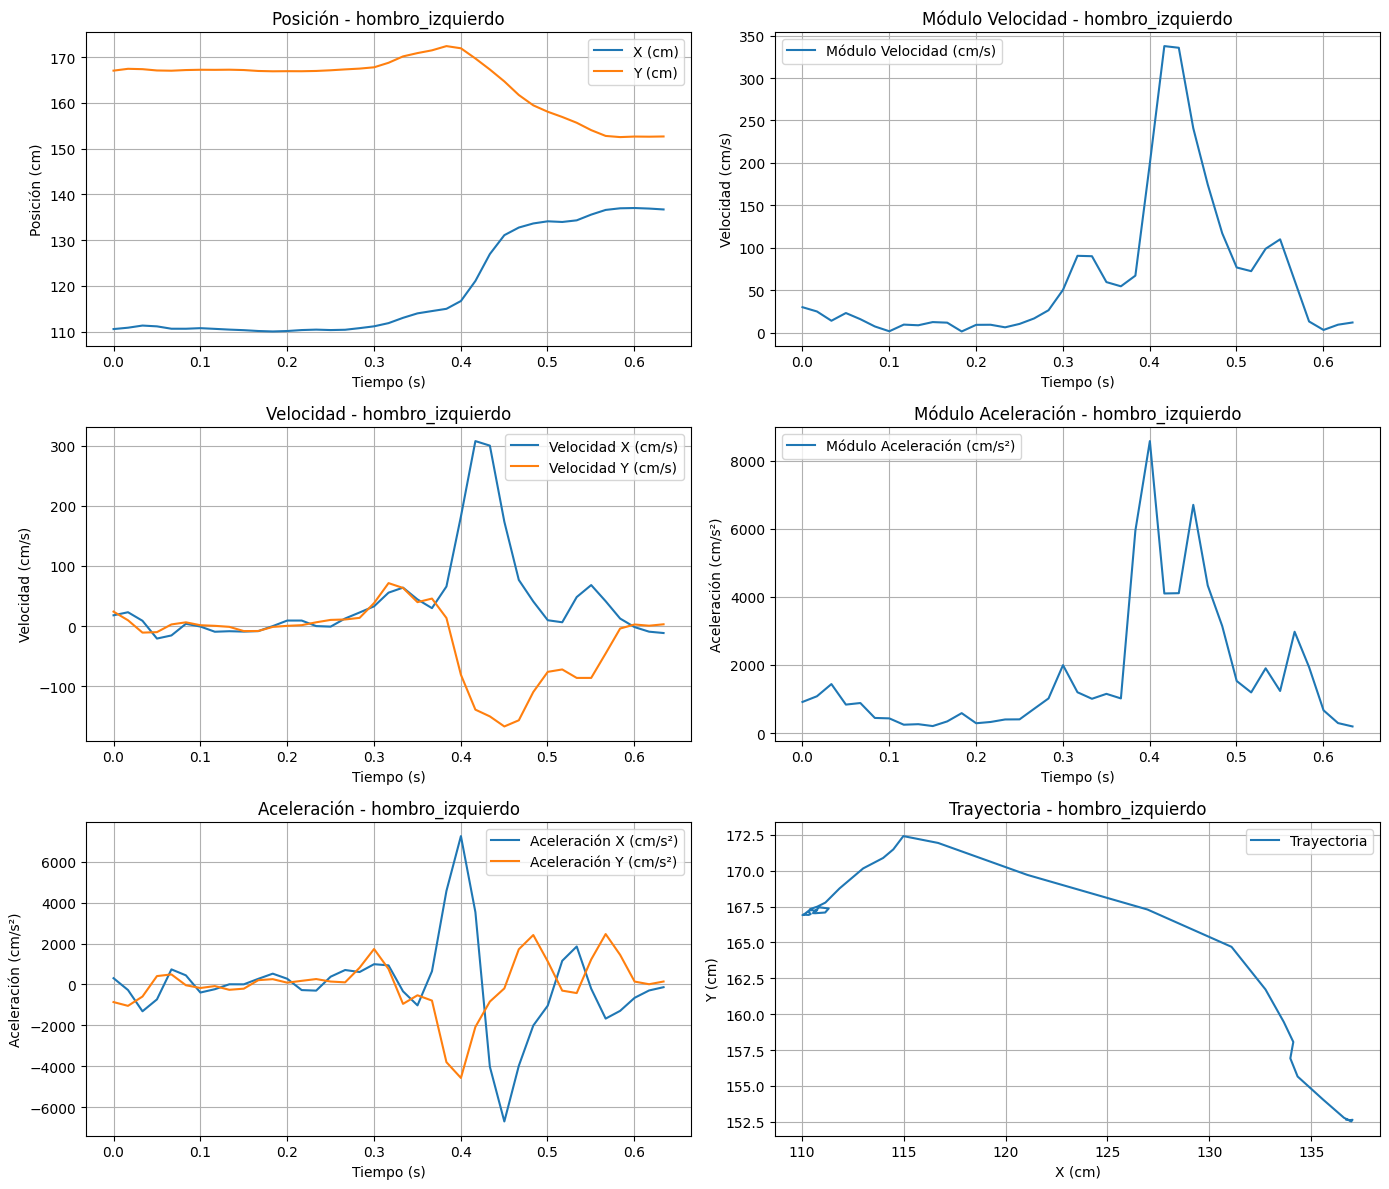

Análisis dinámico para esternon:
1.1 Velocidades:
   - Máxima: 155.06 cm/s en t = 0.50 s
   - Mínima: 4.02 cm/s en t = 0.00 s
1.2 Aceleraciones:
   - Máxima: 2654.93 cm/s² en t = 0.53 s
   - Mínima: 202.74 cm/s² en t = 0.03 s
--------------------------------------------------


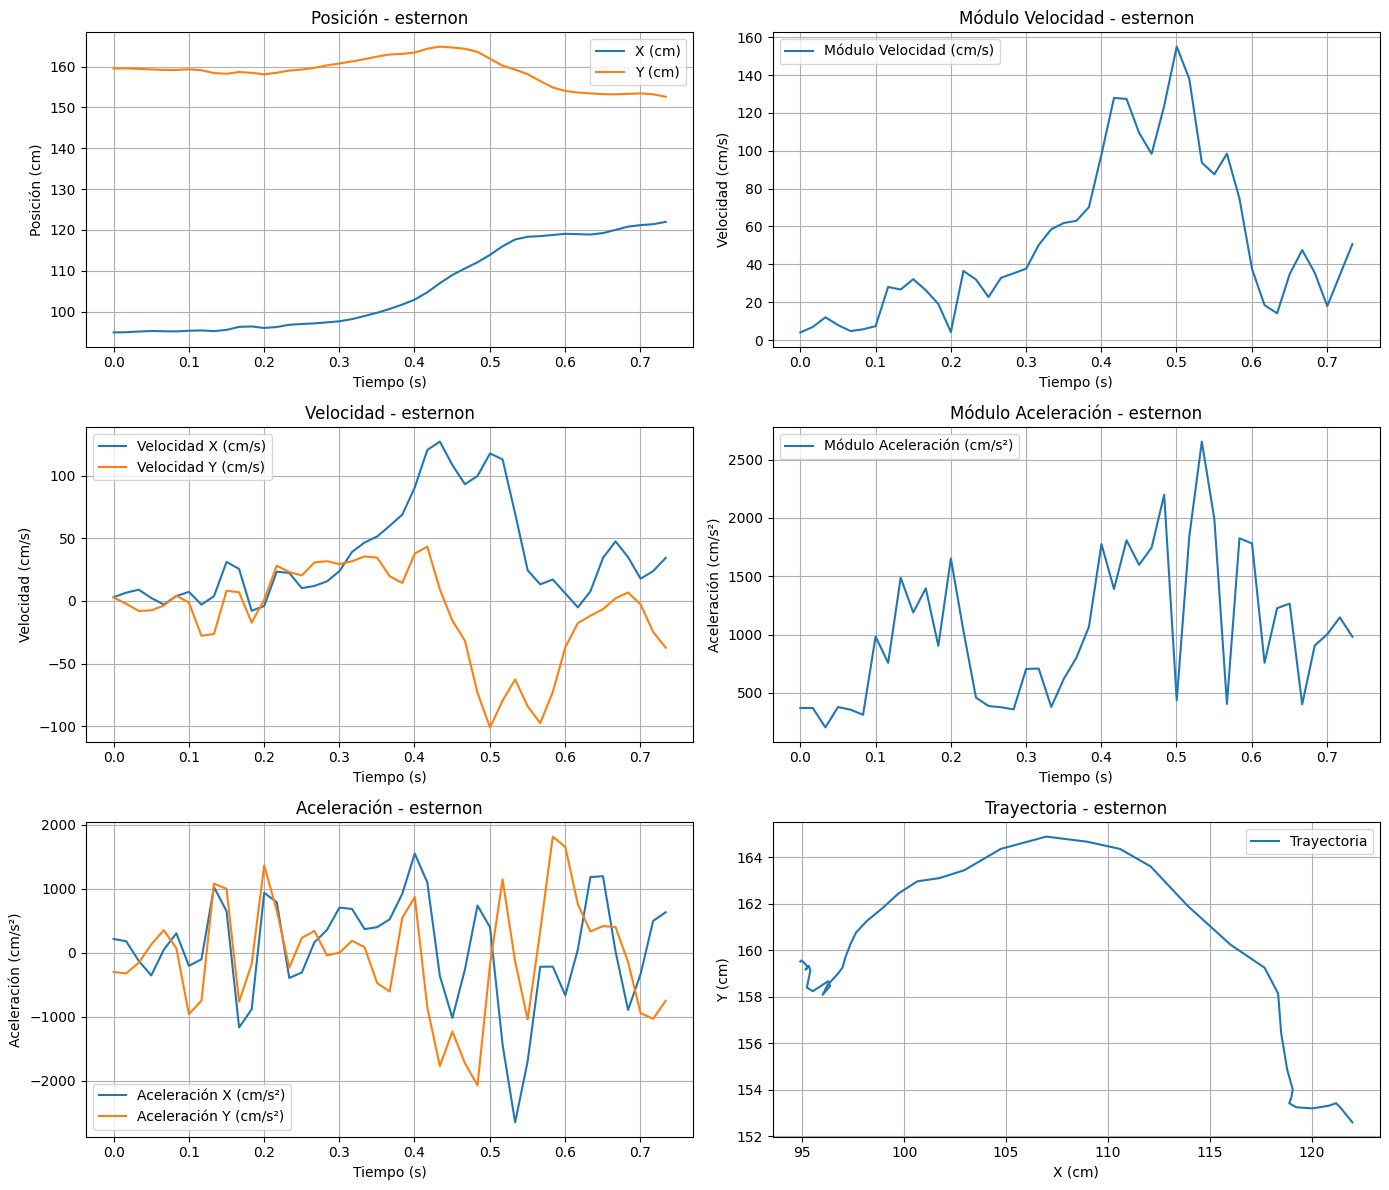

Análisis dinámico para cadera_derecha:
1.1 Velocidades:
   - Máxima: 170.04 cm/s en t = 0.65 s
   - Mínima: 5.78 cm/s en t = 0.10 s
1.2 Aceleraciones:
   - Máxima: 4717.74 cm/s² en t = 0.52 s
   - Mínima: 171.31 cm/s² en t = 0.35 s
--------------------------------------------------


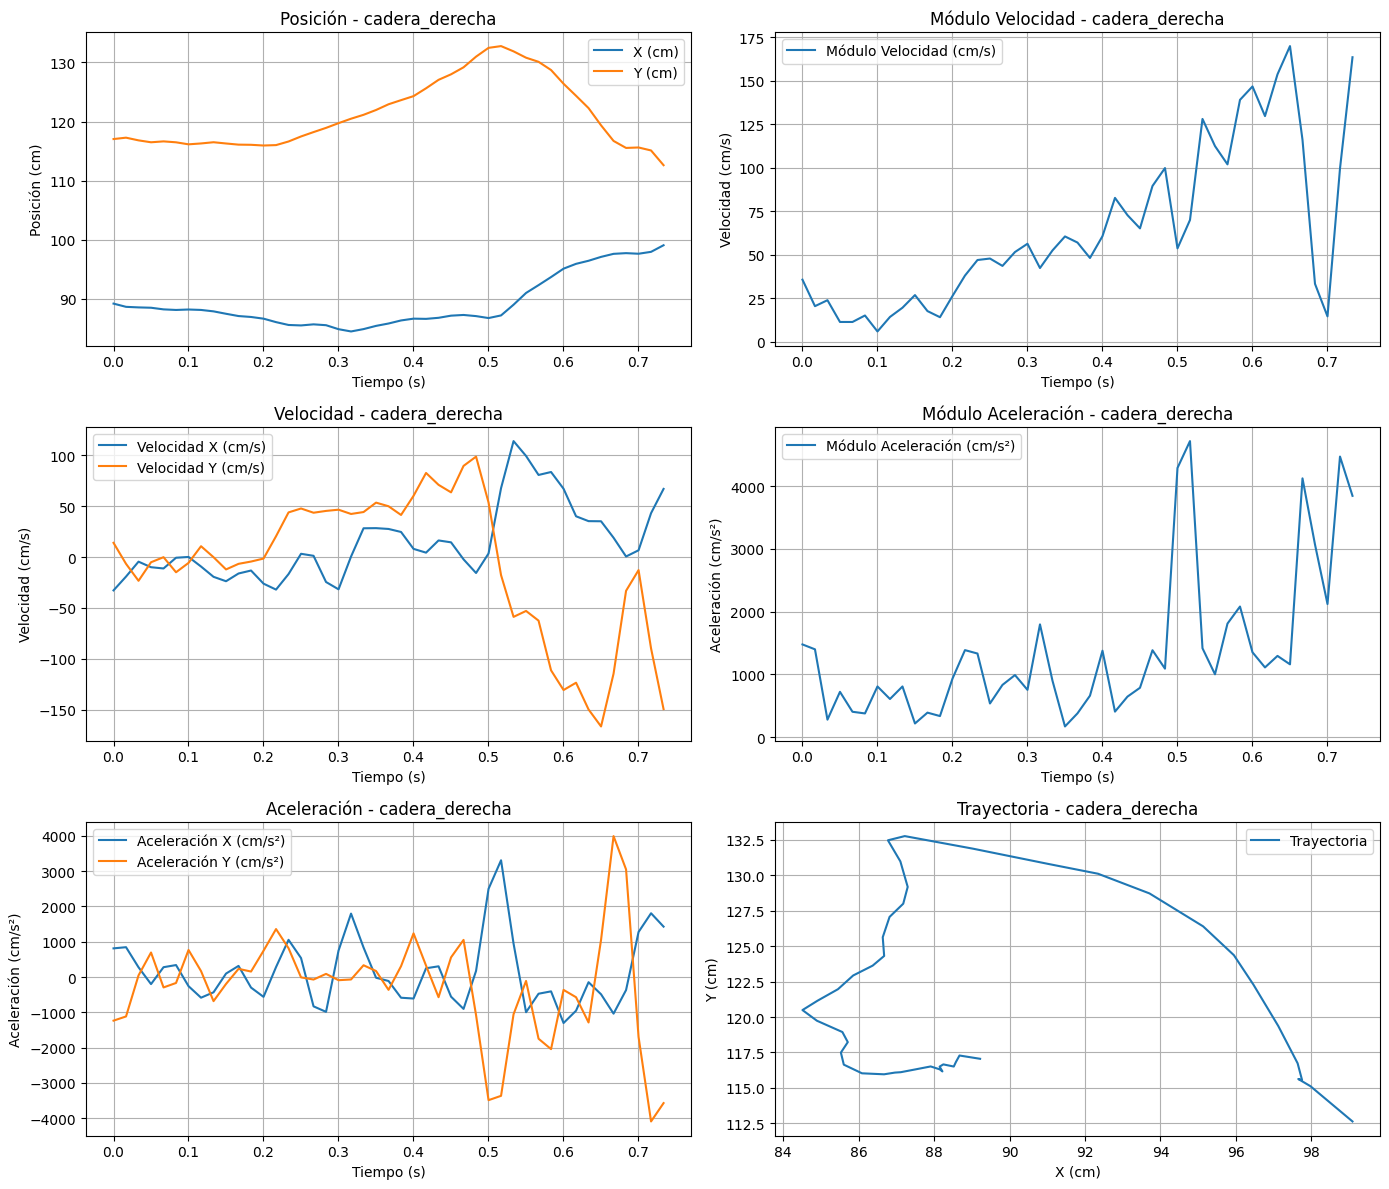

Análisis dinámico para cadera_izquierda:
1.1 Velocidades:
   - Máxima: 210.10 cm/s en t = 0.48 s
   - Mínima: 8.27 cm/s en t = 0.60 s
1.2 Aceleraciones:
   - Máxima: 3411.08 cm/s² en t = 0.60 s
   - Mínima: 33.65 cm/s² en t = 0.15 s
--------------------------------------------------


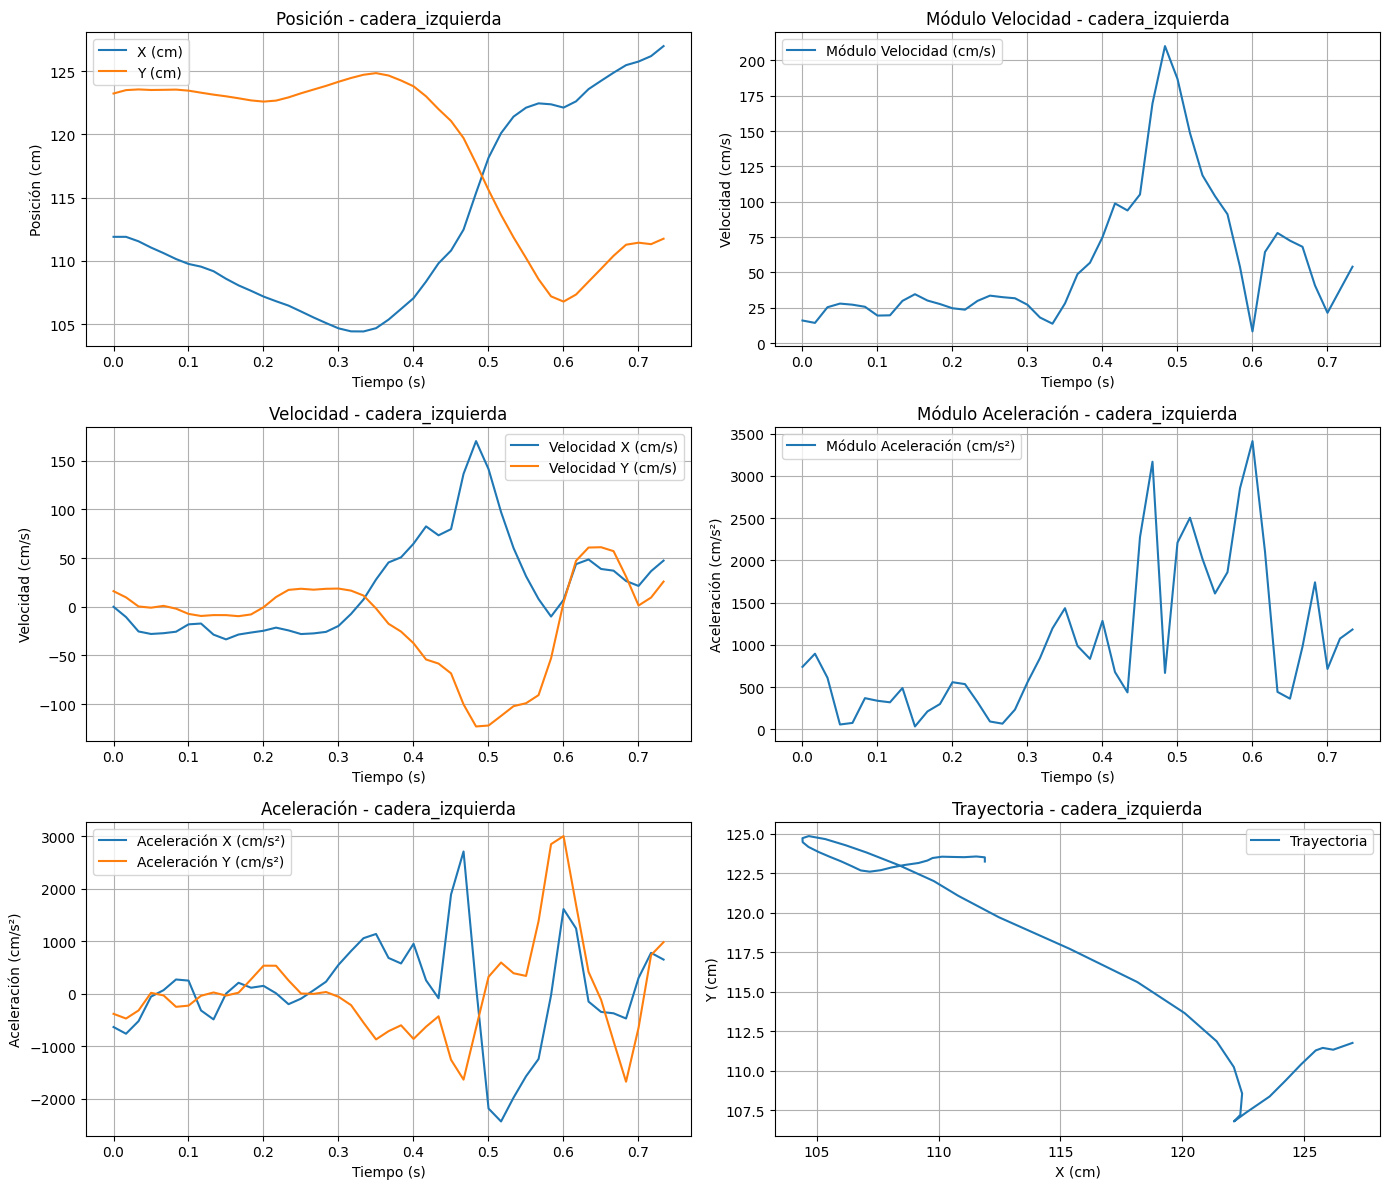

In [9]:
for label in datos:
    tiempo = datos[label]['Time']
    x = datos[label]['X']
    y = datos[label]['Y']

    # Calcular velocidad y aceleración
    vel_x, acel_x = calcular_vel_acel(x, tiempo)
    vel_y, acel_y = calcular_vel_acel(y, tiempo)
    modulo_vel = calcular_modulo(vel_x, vel_y)
    modulo_acel = calcular_modulo(acel_x, acel_y)

    # Encontrar velocidades máximas y mínimas en los módulos
    vel_max = np.max(modulo_vel)
    vel_min = np.min(modulo_vel)
    t_vel_max = tiempo[np.argmax(modulo_vel)]
    t_vel_min = tiempo[np.argmin(modulo_vel)]

    # Encontrar aceleraciones máximas y mínimas en los módulos
    acel_max = np.max(modulo_acel)
    acel_min = np.min(modulo_acel)
    t_acel_max = tiempo[np.argmax(modulo_acel)]
    t_acel_min = tiempo[np.argmin(modulo_acel)]

    # Display de valores extremos antes de plotear
    print(f"Análisis dinámico para {label}:")
    print(f"1.1 Velocidades:")
    print(f"   - Máxima: {vel_max:.2f} cm/s en t = {t_vel_max:.2f} s")
    print(f"   - Mínima: {vel_min:.2f} cm/s en t = {t_vel_min:.2f} s")
    print(f"1.2 Aceleraciones:")
    print(f"   - Máxima: {acel_max:.2f} cm/s² en t = {t_acel_max:.2f} s")
    print(f"   - Mínima: {acel_min:.2f} cm/s² en t = {t_acel_min:.2f} s")
    print("-" * 50)

    # Gráficos
    fig, axs = plt.subplots(3, 2, figsize=(14, 12))

    # Posición
    axs[0, 0].plot(tiempo, x, label='X (cm)')
    axs[0, 0].plot(tiempo, y, label='Y (cm)')
    axs[0, 0].set_title(f'Posición - {label}')
    axs[0, 0].set_xlabel('Tiempo (s)')
    axs[0, 0].set_ylabel('Posición (cm)')
    axs[0, 0].grid(True)
    axs[0, 0].legend()

    # Velocidad
    axs[1, 0].plot(tiempo, vel_x, label='Velocidad X (cm/s)')
    axs[1, 0].plot(tiempo, vel_y, label='Velocidad Y (cm/s)')
    axs[1, 0].set_title(f'Velocidad - {label}')
    axs[1, 0].set_xlabel('Tiempo (s)')
    axs[1, 0].set_ylabel('Velocidad (cm/s)')
    axs[1, 0].grid(True)
    axs[1, 0].legend()

    # Aceleración
    axs[2, 0].plot(tiempo, acel_x, label='Aceleración X (cm/s²)')
    axs[2, 0].plot(tiempo, acel_y, label='Aceleración Y (cm/s²)')
    axs[2, 0].set_title(f'Aceleración - {label}')
    axs[2, 0].set_xlabel('Tiempo (s)')
    axs[2, 0].set_ylabel('Aceleración (cm/s²)')
    axs[2, 0].grid(True)
    axs[2, 0].legend()

    # Módulo de velocidad
    axs[0, 1].plot(tiempo, modulo_vel, label='Módulo Velocidad (cm/s)')
    axs[0, 1].set_title(f'Módulo Velocidad - {label}')
    axs[0, 1].set_xlabel('Tiempo (s)')
    axs[0, 1].set_ylabel('Velocidad (cm/s)')
    axs[0, 1].grid(True)
    axs[0, 1].legend()

    # Módulo de aceleración
    axs[1, 1].plot(tiempo, modulo_acel, label='Módulo Aceleración (cm/s²)')
    axs[1, 1].set_title(f'Módulo Aceleración - {label}')
    axs[1, 1].set_xlabel('Tiempo (s)')
    axs[1, 1].set_ylabel('Aceleración (cm/s²)')
    axs[1, 1].grid(True)
    axs[1, 1].legend()

    # Trayectoria
    axs[2, 1].plot(x, y, label='Trayectoria')
    axs[2, 1].set_title(f'Trayectoria - {label}')
    axs[2, 1].set_xlabel('X (cm)')
    axs[2, 1].set_ylabel('Y (cm)')
    axs[2, 1].grid(True)
    axs[2, 1].legend()

    plt.tight_layout()
    plt.show()


In [10]:
# Solicitar si la persona es diestra o zurda
lateralidad = input("¿La persona es diestra o zurda? (d/z): ").lower()
assert lateralidad in ['d', 'z'], "Por favor, indique 'd' para diestro o 'z' para zurdo."


In [11]:
# Configurar segmentos según lateralidad
if lateralidad == 'd':
    segmentos = [
        ('Antebrazo', 'muñeca', 'codo'),
        ('Brazo', 'codo', 'hombro_derecho'),
        ('Clavícula derecha', 'hombro_derecho', 'esternon'),
        ('Clavícula izquierda', 'esternon', 'hombro_izquierdo'),
        ('Flanco derecho', 'hombro_derecho', 'cadera_derecha'),
        ('Flanco izquierdo', 'hombro_izquierdo', 'cadera_izquierda'),
        ('Pelvis', 'cadera_derecha', 'cadera_izquierda'),
    ]
else:
    segmentos = [
        ('Antebrazo', 'muñeca', 'codo'),
        ('Brazo', 'codo', 'hombro_izquierdo'),
        ('Clavícula derecha', 'hombro_derecho', 'esternon'),
        ('Clavícula izquierda', 'esternon', 'hombro_izquierdo'),
        ('Flanco derecho', 'hombro_derecho', 'cadera_derecha'),
        ('Flanco izquierdo', 'hombro_izquierdo', 'cadera_izquierda'),
        ('Pelvis', 'cadera_derecha', 'cadera_izquierda'),
    ]


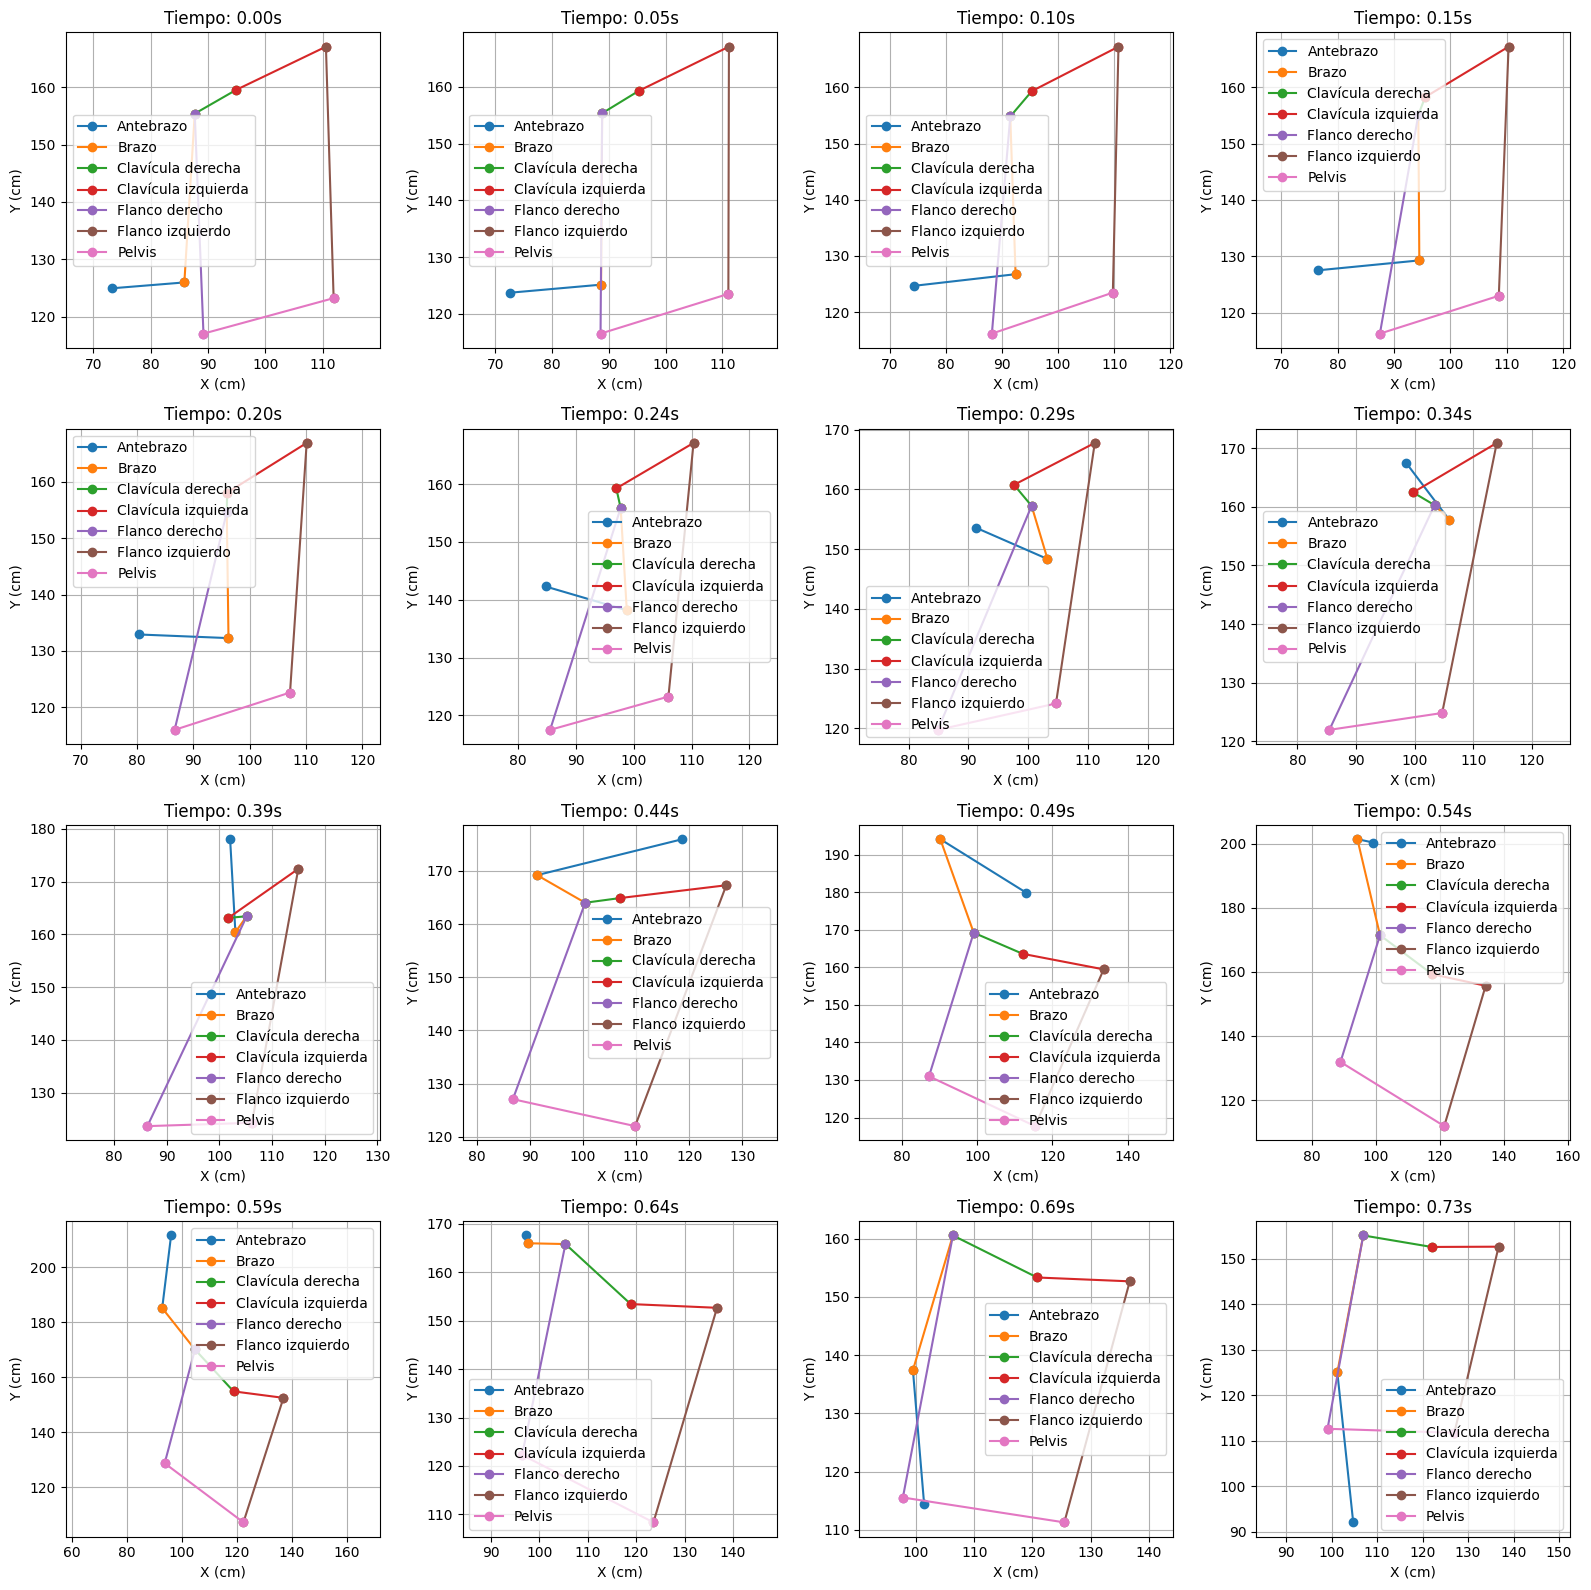

In [12]:
# Crear subplots de segmentos en 4x4
fig, axes = plt.subplots(4, 4, figsize=(16, 16))

# Dividir el tiempo en 16 posiciones equidistantes
tiempo_total = datos['muñeca']['Time']
tiempos_plot = np.linspace(tiempo_total.min(), tiempo_total.max(), 16)

# Para cada posición de tiempo seleccionada
for i, t in enumerate(tiempos_plot):
    ax = axes.flatten()[i]

    # Obtener las posiciones actuales de todos los puntos
    current_positions = {}
    for label in datos:
        idx = (np.abs(datos[label]['Time'] - t)).argmin()
        current_positions[label] = (datos[label]['X'][idx], datos[label]['Y'][idx])

    # Crear y dibujar todos los segmentos en el tiempo actual
    for nombre, inicio, fin in segmentos:
        p1 = current_positions[inicio]
        p2 = current_positions[fin]
        ax.plot([p1[0], p2[0]], [p1[1], p2[1]], marker='o', label=nombre)

    # Configurar el subplot
    ax.set_title(f'Tiempo: {t:.2f}s')
    ax.set_xlabel('X (cm)')
    ax.set_ylabel('Y (cm)')
    ax.grid()
    ax.axis('equal')
    ax.legend()

plt.tight_layout()
plt.show()